In [1]:

import os
print(os.curdir)
os.chdir("drive/My Drive/S9")
!pwd



.
/content/drive/My Drive/S9


# New Section

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
# from model import resnet #import ResNet18
import data_loader
import torch.optim as optim
import random_dataset_ploot
import training
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import random_dataset_ploot
import importlib
from lr_finder import LRFinder
import torch.nn as nn
from model import S11_model
importlib.reload(S11_model)
importlib.reload(data_loader)

trainloader,testloader,classes = data_loader.data_loader_cifar()
model = S11_model.S11Model()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

model = model.to(device)
summary(model, input_size=(3, 32, 32))

  pip install torch-lr-finder -v --global-option="amp"


Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13       

 ship plane   car  frog


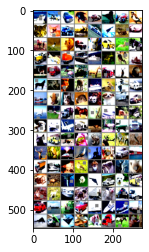

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
random_dataset_ploot.plot_random(trainloader,classes)

/content/drive/My Drive/S9/model/S11_model.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x9 = F.softmax(x9)



Learning rate search finished. See the graph with {finder_name}.plot()


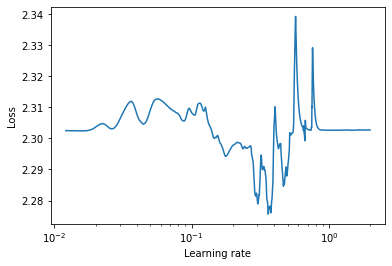

In [0]:
# lr_finder.reset()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum = 0.9, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader, start_lr=1e-5, end_lr=2,
                     num_iter=1980, step_mode="linear")
# lr_finder.range_test(trainloader,start_lr= 0.00001, end_lr=1, num_iter=len(testloader), step_mode="exp")
lr_finder.plot()
best_loss = lr_finder.best_loss
best_lr = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]


# New Section

In [4]:
from torch.optim.lr_scheduler import StepLR,ReduceLROnPlateau,OneCycleLR
import torch.optim as optim
importlib.reload(training)
model =  model.to(device)
optimizer = optim.SGD(model.parameters(), lr=.01,momentum=0.9, weight_decay=5e-3)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.01)
scheduler = OneCycleLR(optimizer, max_lr=.01, epochs=24, 
                       steps_per_epoch=len(trainloader), pct_start=5/24,
                       div_factor=9)

train_accuracy = []
test_accuracy = []
EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    training.train(model, device, trainloader, optimizer, epoch,train_accuracy,scheduler)
    # scheduler.step()
    
    training.test(model, device, testloader,test_accuracy)
    


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.0815253257751465 Batch_id=390 Accuracy=32.26: 100%|██████████| 391/391 [00:27<00:00, 13.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 4162/10000 (41.62%)

EPOCH: 1


Loss=1.8917932510375977 Batch_id=390 Accuracy=50.99: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 4941/10000 (49.41%)

EPOCH: 2


Loss=1.9070188999176025 Batch_id=390 Accuracy=57.70: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 5850/10000 (58.50%)

EPOCH: 3


Loss=1.7626842260360718 Batch_id=390 Accuracy=63.47: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0142, Accuracy: 6738/10000 (67.38%)

EPOCH: 4


Loss=1.7114217281341553 Batch_id=390 Accuracy=72.13: 100%|██████████| 391/391 [00:27<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0138, Accuracy: 7189/10000 (71.89%)

EPOCH: 5


Loss=1.762681245803833 Batch_id=390 Accuracy=75.25: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0136, Accuracy: 7472/10000 (74.72%)

EPOCH: 6


Loss=1.7629362344741821 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0136, Accuracy: 7483/10000 (74.83%)

EPOCH: 7


Loss=1.7031800746917725 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 7322/10000 (73.22%)

EPOCH: 8


Loss=1.6637001037597656 Batch_id=390 Accuracy=80.33: 100%|██████████| 391/391 [00:27<00:00, 14.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0135, Accuracy: 7611/10000 (76.11%)

EPOCH: 9


Loss=1.667320966720581 Batch_id=390 Accuracy=81.21: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0135, Accuracy: 7635/10000 (76.35%)

EPOCH: 10


Loss=1.7073049545288086 Batch_id=390 Accuracy=82.09: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0133, Accuracy: 7887/10000 (78.87%)

EPOCH: 11


Loss=1.6617727279663086 Batch_id=390 Accuracy=86.97: 100%|██████████| 391/391 [00:27<00:00, 14.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0130, Accuracy: 8303/10000 (83.03%)

EPOCH: 12


Loss=1.568082571029663 Batch_id=390 Accuracy=89.10: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0130, Accuracy: 8305/10000 (83.05%)

EPOCH: 13


Loss=1.5489981174468994 Batch_id=390 Accuracy=90.30: 100%|██████████| 391/391 [00:27<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 8539/10000 (85.39%)

EPOCH: 14


Loss=1.5764051675796509 Batch_id=390 Accuracy=91.41: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0128, Accuracy: 8524/10000 (85.24%)

EPOCH: 15


Loss=1.5647722482681274 Batch_id=390 Accuracy=92.35: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 8777/10000 (87.77%)

EPOCH: 16


Loss=1.5435956716537476 Batch_id=390 Accuracy=93.57: 100%|██████████| 391/391 [00:27<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 8744/10000 (87.44%)

EPOCH: 17


Loss=1.5171133279800415 Batch_id=390 Accuracy=94.67: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 8764/10000 (87.64%)

EPOCH: 18


Loss=1.5416851043701172 Batch_id=390 Accuracy=95.54: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0126, Accuracy: 8873/10000 (88.73%)

EPOCH: 19


Loss=1.5261539220809937 Batch_id=390 Accuracy=96.58: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 8900/10000 (89.00%)

EPOCH: 20


Loss=1.5079421997070312 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [00:27<00:00, 14.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 9061/10000 (90.61%)

EPOCH: 21


Loss=1.489431619644165 Batch_id=390 Accuracy=97.90: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 9090/10000 (90.90%)

EPOCH: 22


Loss=1.506779670715332 Batch_id=390 Accuracy=98.19: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 9131/10000 (91.31%)

EPOCH: 23


Loss=1.488855242729187 Batch_id=390 Accuracy=98.40: 100%|██████████| 391/391 [00:27<00:00, 14.08it/s]



Test set: Average loss: 0.0124, Accuracy: 9141/10000 (91.41%)

